# Part 2. Twiter Data Analysis

## 1. Query Term : vulnerability    
<pre>a. Calculate __the number of twitters__ related to vulnerability

In [28]:
# Import packages
import pyes
import time
import pandas as pd

# Connect to Elasticsearch
conn = pyes.es.ES('localhost:9200')

# Query tweets which contain vulnerability
tq = pyes.query.TermQuery(field="text", value="vulnerability")

# Search from twitter2 database
result = conn.search(query=tq, indices='twitter2')

# Create empty lists to store the data
id_list = []
tweet = []
year = []
month = []

# Save the results
for i in result:
    id_list.append(i['user']['id'])
    tweet.append(i['text'])
    year.append(time.strftime('%Y', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))
    month.append(time.strftime('%m', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))

# Merge all the lists into the table
data = pd.DataFrame({'id':id_list, 'year':year, 'month':month, 'tweets':tweet})

# Delete the row which is not created at 2015
data = data[data.year == '2015']
        
# Take out the repeated id
num_of_twitters = set(data['id'])

print("There are %d Twitters concerned about vulnerability" % len(num_of_twitters),)

There are 1454 Twitters concerned about vulnerability


<pre><code>  b. Calculate __the number of tweets__ related to vulnerability

In [29]:
# Take out the repeated tweets
num_of_tweets = set(data['tweets'])

print("Vulnerability has %d tweets" % (len(num_of_tweets),))

Vulnerability has 1001 tweets


<pre><code>  c. Plot __the bar chart__ of Twitters related to vulnerability every month in 2015.

Populating the interactive namespace from numpy and matplotlib


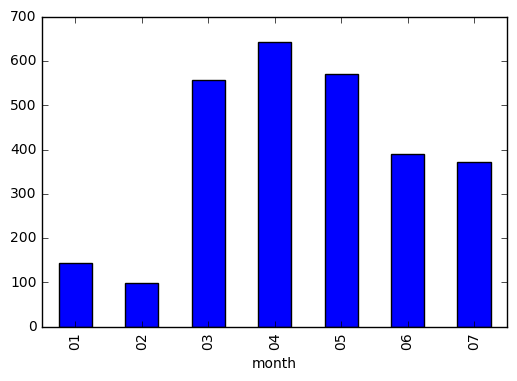

In [30]:
%pylab inline

# Plot the bar chart of id
data.id.groupby(data.month).count().plot(kind='bar')

<pre><code>  d. Plot __the bar chart__ of Tweets related to vulnerability every month.

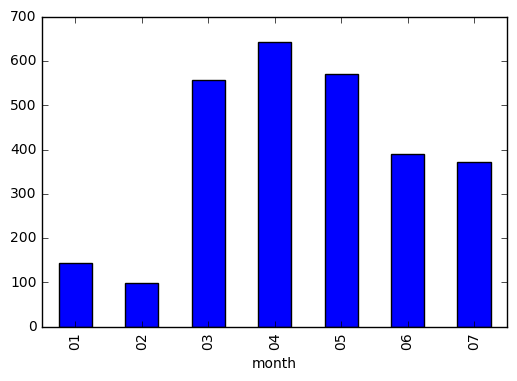

In [31]:
# Plot the bar chart of id
data.tweets.groupby(data.month).count().plot(kind='bar')

<pre><code>  e. Plot __the porpotional pie chart__ of Tweets which related to vulnerability and have url / do not have url.

(-1.0026039411750405,
 1.0000000153448421,
 -1.00665018401461,
 1.0057999820685024)

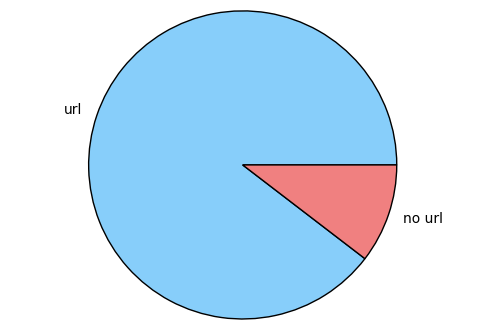

In [32]:
url_count = 0
nu_url_count = 0

# Count the number of having urls and not having urls
for i in data['tweets']:
    if 'http' in i :
        url_count += 1
    else:
        nu_url_count += 1

import matplotlib.pyplot as plt

# Set the lables , numbers and colors
label = 'url', 'no url'
freq = [url_count, nu_url_count]        
color = ['lightskyblue', 'lightcoral']

# Plot the pie chart
plt.pie(freq, labels=label, colors=color)
plt.axis('equal')

## 2. Qurey Term : CVE

In [33]:
# Import packages
import pyes
import time
import pandas as pd

# Connect to Elasticsearch
conn = pyes.es.ES('localhost:9200')

# Query tweets which contain vulnerability
tq = pyes.query.TermQuery(field="text", value="cve")

# Search from twitter2 database
result = conn.search(query=tq, indices='twitter2')

# Create empty lists to store the data
id_list = []
tweet = []
year = []
month = []

# Save the results
for i in result:
    id_list.append(i['user']['id'])
    tweet.append(i['text'])
    year.append(time.strftime('%Y', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))
    month.append(time.strftime('%m', time.strptime(i['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))

# Merge all the lists into the table
data = pd.DataFrame({'id':id_list, 'year':year, 'month':month, 'tweets':tweet})

# Delete the row which is not created at 2014
data = data[data.year == '2014']

<pre>a. Calculate __the number of twitters__ related to CVE

In [34]:
num_of_twitters = set(data['id'])
print("There are %d Twitters concerned about CVE" % len(num_of_twitters),)

There are 68 Twitters concerned about CVE


<pre><code>b. Calculate __the number of tweets__ related to CVE

In [35]:
# Take out the repeated tweets
num_of_tweets = set(data['tweets'])

print("CVE has %d tweets" % (len(num_of_tweets),))

CVE has 282 tweets


<pre><code>c. Plot __the bar chart__ of Twitters related to CVE every month in 2014.

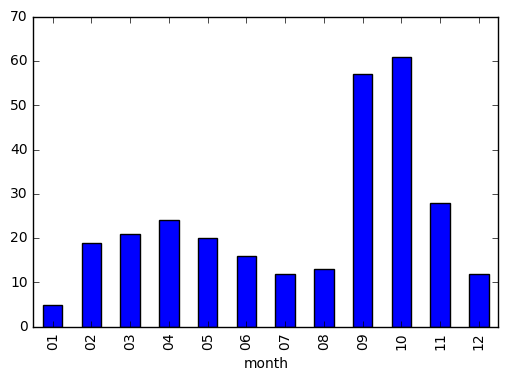

In [36]:
# Plot the bar chart of id
data.id.groupby(data.month).count().plot(kind='bar')

<pre><code>d. Plot __the bar chart__ of Tweets related to CVE every month.

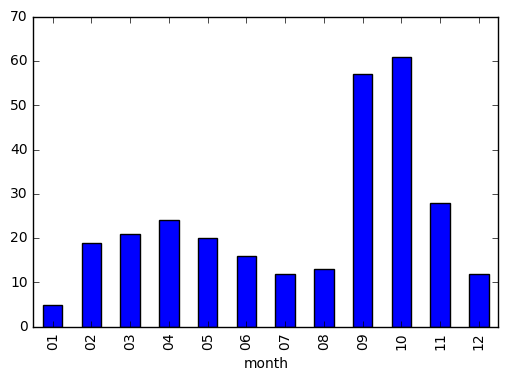

In [37]:
# Plot the bar chart of id
data.tweets.groupby(data.month).count().plot(kind='bar')

<pre><code>e. Plot __the porpotional pie chart__ of Tweets which related to CVE and have url / do not have url.

(-1.0048867947966813, 1.0, -1.0054339520703743, 1.0058102559328048)

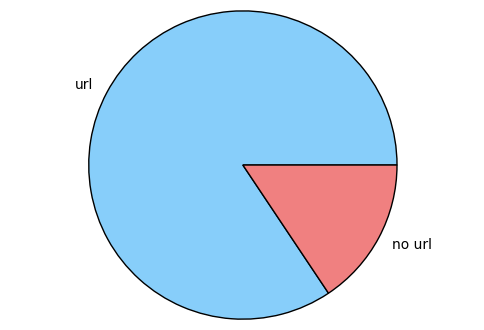

In [38]:
url_count = 0
nu_url_count = 0

# Count the number of having urls and not having urls
for i in data['tweets']:
    if 'http' in i :
        url_count += 1
    else:
        nu_url_count += 1

import matplotlib.pyplot as plt

# Set the lables , numbers and colors
label = 'url', 'no url'
freq = [url_count, nu_url_count]        
color = ['lightskyblue', 'lightcoral']

# Plot the pie chart
plt.pie(freq, labels=label, colors=color)
plt.axis('equal')

<pre><code>f. 請依照每個月繪製各Twitter所提到CVE的箱型圖(每月最多發表帳號的次數、每月平均發表的次數、每月最少發表的次數、第一分位數、第三分位數)

C:\Users\Jennifer\Anaconda3\lib\site-packages\ipykernel\__main__.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\Jennifer\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


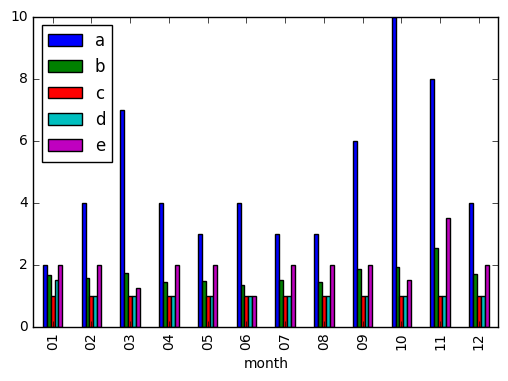

In [39]:
# Sort the month out
month = list(set(data['month']))
month.sort()

# Import other packages
from collections import Counter
import numpy as np

a = []
b = []
c = []
d = []
e = []

# Calculate the 5 lists
# a means 每月發表最多次的帳號
# b means 該月平均發表次數
# c means 該月發表最少的帳號發表次數
# d means 該月發表次數第一分位
# e means 該月發表次數第三分位
for i in range(len(month)):
    da = data[data.month == month[i]]
    mcommon= [ite for ite, it in Counter(da['id']).most_common(1)]
    a.append(len(da[data.id == mcommon]))
    b.append(len(set(da['tweets']))/len(set(da['id'])))
    uncommon = [ite for ite, it in Counter(da['id']).most_common()[:-1-1:-1]]
    c.append(len(da[data.id == uncommon]))
    count =  Counter(da['id']).most_common()
    count = np.array(count)                                  
    d.append(np.percentile(count[:, 1], 25))
    e.append(np.percentile(count[:, 1], 75))

# Rearrange the 5 lists into one daataframe
adata = pd.DataFrame({'month':month,'a':a, 'b':b, 'c':c, 'd':d, 'e':e})

# Replace the index into months
adata.set_index(["month"],inplace=True)

# Plot the bar chart
adata.plot(kind='bar')

<pre><code>g. Can you analyze __the weakness of data security__ by the target account? And how to analyze?

## Part 3. Twitter Account Analysis

<pre>Set three attribute : CVE, Vulnerability and Exploit
Choose top 30 accounts

In [62]:
# Import packages
import pyes
import pandas as pd
from collections import Counter

# Connect to Elasticsearch
conn = pyes.es.ES('localhost:9200')

# Query tweets which contain cve, vulnerability and exploit
tsf = pyes.filters.TermsFilter(field="text", values=["cve", "vulnerability", "exploit"]) 
fq=pyes.query.FilteredQuery(pyes.query.MatchAllQuery(), tsf)

# Search from twitter2 database
result = conn.search(query=fq, indices='twitter2')

# Create two empty list to store the id and text from original data
id_list = []
tweet = []

# Save the result of id and text
for i in result:
    id_list.append(i['user']['id'])
    tweet.append(i['text'])

# Combine the result to a pandas data frame
data = pd.DataFrame({'id':id_list, 'tweets':tweet})

In [64]:
# Find out the top 30 accounts
topaccount= [ite for ite, it in Counter(data['id']).most_common(30)]

# Filter out the data of top 30 accounts
topdata = []
for a in topaccount:
    topdata.append(data[data.id == a])

cve_ratio = []
cve_num = 0
vulnerability_ratio = []
vulnerability_num = 0
exploit_ratio = []
exploit_num = 0

# Calculate the ratio of three attributes of each account
for b in range(len(topdata)):
    account = topdata[b]['tweets']
    account.astype(str)
    if any("CVE" in s for s in account):
        cve_num += 1
    cve_ratio.append(cve_num/len(account))    
    
    if any("vulnerability" in s for s in account):
        vulnerability_num += 1 
    vulnerability_ratio.append(vulnerability_num/len(account))
    
    if any("exploit" in s for s in account):
        exploit_num += 1
    exploit_ratio.append(exploit_num/len(account)) 

# Combine the result to pandas data frame
ds = pd.DataFrame({'id':topaccount, 'CVE ratio':cve_ratio, 'Vulnerability ratio': vulnerability_ratio, 'Exploit ratio':exploit_ratio})

print(ds)

    CVE ratio  Exploit ratio  Vulnerability ratio         id
0    0.001901       0.001901             0.001901  405658492
1    0.007168       0.007168             0.007168  118059149
2    0.011811       0.011811             0.011811   18789893
3    0.017316       0.017316             0.017316   43130563
4    0.022624       0.022624             0.022624   18983429
5    0.035294       0.035294             0.035294   18252252
6    0.050000       0.050000             0.050000   11791512
7    0.060606       0.060606             0.060606   15589731
8    0.083333       0.083333             0.083333  297856522
9    0.096154       0.096154             0.096154   97450156
10   0.107843       0.107843             0.107843   14277681
11   0.122449       0.122449             0.122449   19206209
12   0.151163       0.151163             0.151163    8236572
13   0.166667       0.166667             0.166667   14090906
14   0.200000       0.200000             0.200000   18476766
15   0.213333       0.21

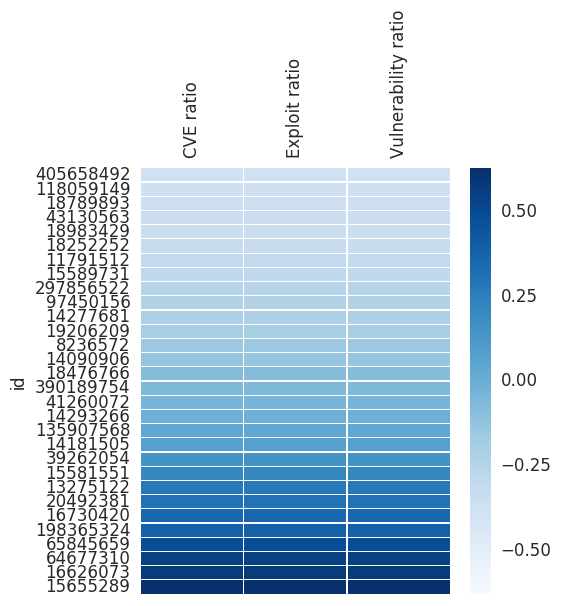

In [65]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# normalize data
dsnor = pd.DataFrame({'CVE ratio':cve_ratio, 'Vulnerability ratio': vulnerability_ratio, 'Exploit ratio':exploit_ratio})
dsnor.set_index(ds["id"],inplace=True)
ds_norm = (dsnor - dsnor.mean()) / (dsnor.max() - dsnor.min())

# set appropriate font and dpi
sns.set(font_scale=1.2)
sns.set_style({"savefig.dpi": 100})

# plot out the heatmap
ax = sns.heatmap(ds_norm, cmap=plt.cm.Blues, linewidths=.1)
# set the x-axis labels on the top
ax.xaxis.tick_top()
# rotate the x-axis labels
plt.xticks(rotation=90)
# get figure (usually obtained via "fig,ax=plt.subplots()" with matplotlib)
fig = ax.get_figure()
# specify dimensions
fig.set_size_inches(5, 5.5)